## Import Important Libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Import train data

In [41]:
train = pd.read_excel('Data_Train.xlsx')

In [42]:
train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


### Exploratory Data Analysis

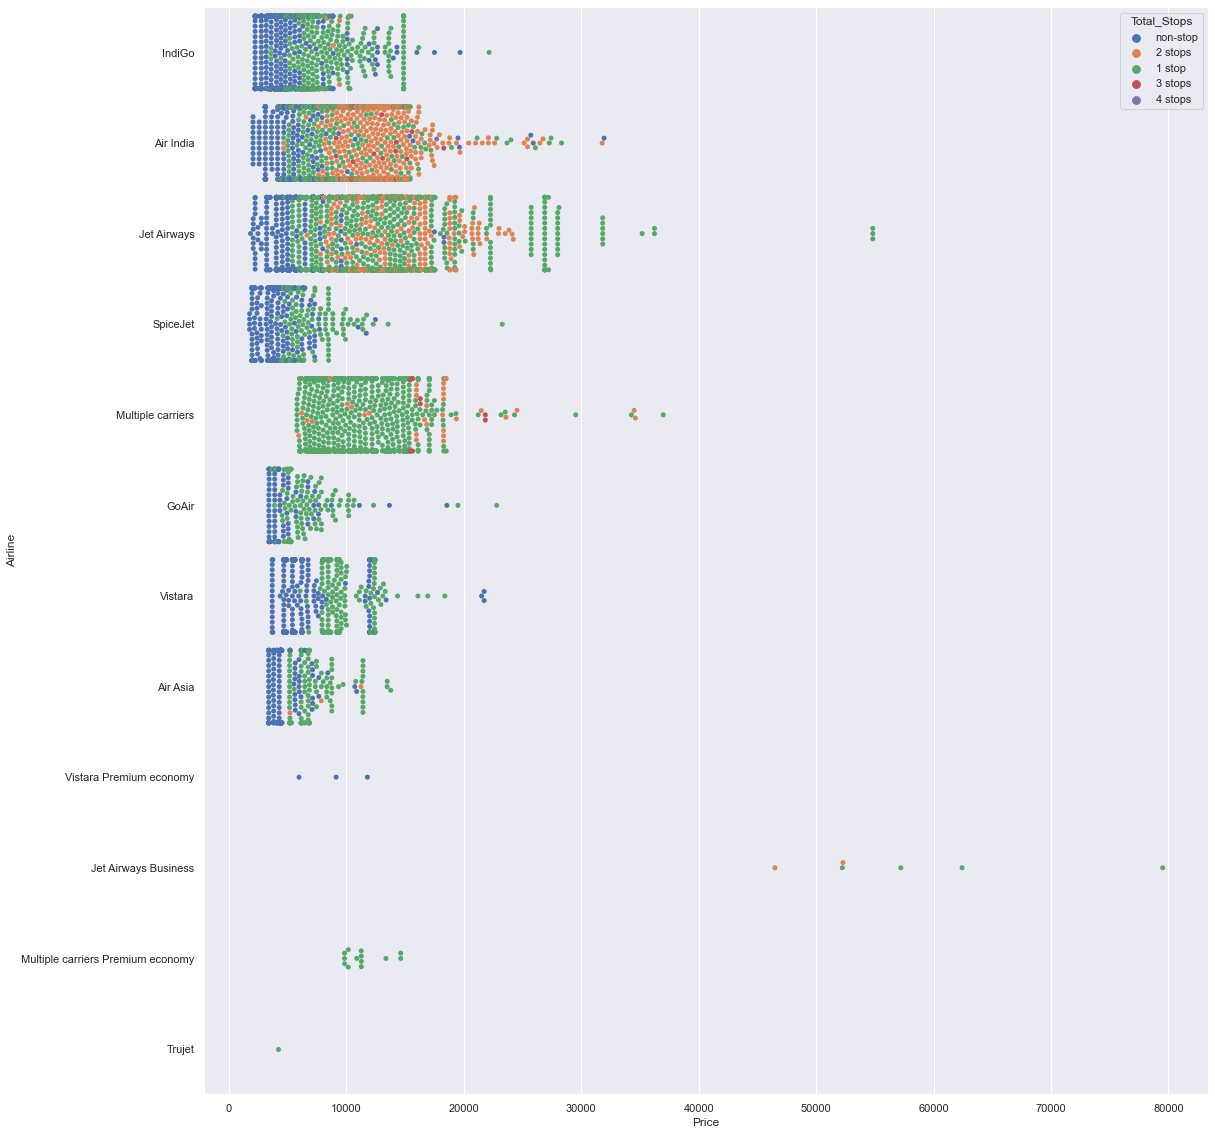

In [43]:
plt.figure(figsize=(18,20))
sns.swarmplot(y='Airline',x='Price',hue='Total_Stops',data=train)

#### Count of flights

In [85]:
pd.crosstab(train['Source'],train['Destination'],margins=True)

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,All
Source,,,,,,,
Banglore,0,0,1265,0,0,932,2197
Chennai,0,0,0,0,381,0,381
Delhi,0,4536,0,0,0,0,4536
Kolkata,2871,0,0,0,0,0,2871
Mumbai,0,0,0,697,0,0,697
All,2871,4536,1265,697,381,932,10682


#### Average Price of the flight between two locations

In [110]:
pd.crosstab(train['Source'],train['Destination'],values=train.Price,margins=True,aggfunc=(lambda x:int(np.mean(x))))

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,All
Source,,,,,,,
Banglore,NaN,NaN,5143.0,NaN,NaN,11917.0,8017
Chennai,NaN,NaN,NaN,NaN,4789.0,NaN,4789
Delhi,NaN,10540.0,NaN,NaN,NaN,NaN,10540
Kolkata,9158.0,NaN,NaN,NaN,NaN,NaN,9158
Mumbai,NaN,NaN,NaN,5059.0,NaN,NaN,5059
All,9158.0,10540.0,5143.0,5059.0,4789.0,11917.0,9087


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Drop Nan Values

In [46]:
train.dropna(inplace = True)

In [47]:
train['Journey_day']=pd.to_datetime(train.Date_of_Journey, format= '%d/%m/%Y').dt.day
train['Journey_month']=pd.to_datetime(train.Date_of_Journey, format= '%d/%m/%Y').dt.month
train['Dep_hour']=pd.to_datetime(train.Dep_Time).dt.hour
train['Dep_min']=pd.to_datetime(train.Dep_Time).dt.minute

#### Convert categorical variable into dummy/indicator variables.


In [9]:
Airline = pd.get_dummies(train['Airline'], drop_first= True)
Source = pd.get_dummies(train['Source'], drop_first= True)
Destination = pd.get_dummies(train['Destination'], drop_first = True)
Stops=pd.get_dummies(train['Total_Stops'],drop_first=True)

In [10]:
train=pd.concat([train,Airline,Source,Destination,Stops],axis=1)

In [12]:
train.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Airline','Source','Destination','Total_Stops'],axis=1,inplace=True)

In [13]:
train.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

### Import Test Data

In [14]:
test = pd.read_excel("Test_set.xlsx")

train.head(3)

test.dropna(inplace = True)

test['Journey_day']=pd.to_datetime(test.Date_of_Journey, format= '%d/%m/%Y').dt.day
test['Journey_day']=pd.to_datetime(test.Date_of_Journey, format= '%d/%m/%Y').dt.day
test['Dep_hour']=pd.to_datetime(test.Dep_Time).dt.hour
test['Dep_min']=pd.to_datetime(test.Dep_Time).dt.minute

Airline = pd.get_dummies(test['Airline'], drop_first= True)
Source = pd.get_dummies(test['Source'], drop_first= True)
Destination = pd.get_dummies(test['Destination'], drop_first = True)
Stops=pd.get_dummies(test['Total_Stops'],drop_first=True)

test=pd.concat([test,Airline,Source,Destination,Stops],axis=1)

test.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Airline','Source','Destination','Total_Stops'],axis=1,inplace=True)
test.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

### Rename column names

In [15]:
train.columns=['Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Air_India', 'GoAir', 'IndiGo', 'Jet_Airways', 'Jet_Airways_Business',
       'Multiple_carriers', 'Multiple_carriers_Premium_economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara_Premium_economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'stops_2', 'stops_3', 'stops_4', 'non_stop']

In [16]:
test.columns=['Journey_day', 'Dep_hour', 'Dep_min', 'Air_India', 'GoAir', 'IndiGo',
       'Jet_Airways', 'Jet_Airways_Business', 'Multiple_carriers',
       'Multiple_carriers+Premium_economy', 'SpiceJet', 'Vistara',
       'Vistara_Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'stops_2',
       'stops_3', 'stops_4', 'non_stop']

In [17]:
X=train.drop('Price',axis=1)
y=train['Price']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model Selection and fitting the data

In [19]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
y_pred = reg_rf.predict(X_test)

In [21]:
reg_rf.score(X_train, y_train)

0.9085812188598433

In [22]:
reg_rf.score(X_test, y_test)

0.8313298951329401

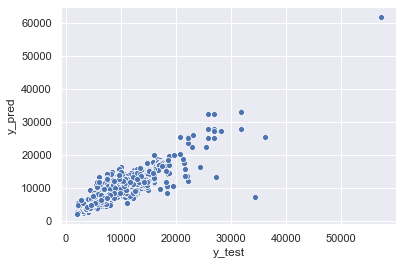

In [68]:
sns.scatterplot(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1188.2643078144022
MSE: 3636874.301345821
RMSE: 1907.059071278554


In [26]:
metrics.r2_score(y_test, y_pred)

0.8313298951329401

## Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [29]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [30]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [31]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [32]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

### Saving the Data

In [33]:
import pickle
pickle.dump(rf_random, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [34]:
y_prediction = model.predict(X_test)

In [35]:
metrics.r2_score(y_test, y_prediction)

0.8422555219008188